# Algebra liniowa z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 2

Uzupełnij poniżej swoje dane i sprawdź czy wyświetlają się poprawnie:

In [210]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


Przed dalszą pracą załadujmy bibliotekę Numpy i poprawmy czytelność wyników ustawiając szerokość wyświetlanych danych, tak aby nie było zawijania wierszy:

In [211]:
import numpy as np
np.set_printoptions(linewidth=150)

### Obliczenia numeryczne

Podczas zajęć wykorzystamy nieco bardziej rozbudowaną funkcję pomocniczą, która będzie wyświetlać nam odpowiednio sformatowane bity liczby zmiennoprzecinkowej (32- lub 64-bitowej), kolejno znak, wykładnik i mantysę:

In [212]:
import struct
def float_to_binary(num, prec):
    assert prec in (32, 64)
    
    if prec == 32:
        pack_format = '!f'  # Format dla float32
        unpack_format = '!I'  # Unsigned int 32-bit
        bits_format = '032b'
        splitpos = 8 + 1  # 1 bit znaku, 8 bitów wykładnika dla float32
    elif prec == 64:
        pack_format = '!d'  # Format dla float64
        unpack_format = '!Q'  # Unsigned long long 64-bit
        bits_format = '064b'
        splitpos = 11 + 1  # 1 bit znaku, 11 bitów wykładnika dla float64
    else:
        return None
    
    # Konwersja liczby zmiennoprzecinkowej na ciąg bitów
    packed_num = struct.pack(pack_format, num)
    unpacked_num = struct.unpack(unpack_format, packed_num)[0]
    bits = format(unpacked_num, bits_format)
    
    sign = bits[0]
    exponent = bits[1:splitpos]
    fraction = bits[splitpos:]
    
    return f"{sign} {exponent} {fraction}"

Poniżej znajduje się przykład użycia dla 32-bitowej liczby `0.15625` (możesz porównać wynik z przykładem na stronie [Single-precision floating-point format. IEEE 754 standard: binary32](https://en.wikipedia.org/wiki/Single-precision_floating-point_format#IEEE_754_standard:_binary32)):

In [213]:
print(float_to_binary(0.15625, 32))

0 01111100 01000000000000000000000


Jak widać, mamy tu kolejno bit znaku `0`, potem bity wykładnika `01111100` i bity mantysy `01000000000000000000000`. Obserwacja tych bitów pomoże nam nieco w rozróżnieniu i prezentacji niektórych liczb zmiennopozycyjnych występujących w dalszej części materiałów.

#### Odejmowanie liczb bliskich sobie

##### Zadanie 1 (2 pkt.)

Podczas operacji na liczbach zmiennopozycyjnych, które są blisko siebie, mogą dawać nieoczywiste wyniki.

Na początek stwórz dwie zmienne `x1` i `y1` zawierające liczby `1.000000000000002` i `1.000000000000001` typu [`np.float64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64), odejmij je od siebie zapisując wynik w `z1`. Dla porównania stwórz zmienną `w1` o wartości `0.000000000000001` typu [`np.float64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64). Użyj funkcji `float_to_binary()` do utworzenia reprezentacji binarnych powyższych zmiennych i zapisz wyniki w zmiennych `x1_f2b`, `y1_f2b`, `z1_f2b` i `w1_f2b`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x1_f2b, x1)` | `0 01111111111 0000000000000000000000000000000000000000000000001001 1.000000000000002` |
| `print(y1_f2b, y1)` | `0 01111111111 0000000000000000000000000000000000000000000000000101 1.000000000000001` |
| `print(z1_f2b, z1)` | `0 01111001101 0000000000000000000000000000000000000000000000000000 8.881784197001252e-16` |
| `print(w1_f2b, w1)` | `0 01111001101 0010000000111010111110011110111001110101011000010110 1e-15` |

In [214]:
# UMIEŚĆ SWÓJ KOD TUTAJ
x1 = np.float64(1.000000000000002)
y1 = np.float64(1.000000000000001)
z1 = x1 - y1
w1 = np.float64(0.000000000000001)

x1_f2b = float_to_binary(x1, 64)
y1_f2b = float_to_binary(y1, 64)
z1_f2b = float_to_binary(z1, 64)
w1_f2b = float_to_binary(w1, 64)

print(x1_f2b, x1)
print(y1_f2b, y1)
print(z1_f2b, z1)
print(w1_f2b, w1)


0 01111111111 0000000000000000000000000000000000000000000000001001 1.000000000000002
0 01111111111 0000000000000000000000000000000000000000000000000101 1.000000000000001
0 01111001101 0000000000000000000000000000000000000000000000000000 8.881784197001252e-16
0 01111001101 0010000000111010111110011110111001110101011000010110 1e-15


Skoncentrujemy się teraz na liczbach `9999999999999999` i `9999999999999998` oraz ich różnicy (powinna wynieść `1`) z uwzględnieniem różnych reprezentacji.

Stwórz dwie zmienne zawierające te dwie liczby jako zmienne odpowiednio `x2` i `y2` typu [`np.int64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.int64), i odejmij je od siebie zapisując wynik w zmiennej `z2`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x2)` | `9999999999999999` |
| `print(y2)` | `9999999999999998` |
| `print(z2)` | `1` |

In [215]:
# UMIEŚĆ SWÓJ KOD TUTAJ
x2 = np.int64(9999999999999999)
y2 = np.int64(9999999999999998)
z2 = x2 - y2

print(x2)
print(y2)
print(z2)


9999999999999999
9999999999999998
1


Stwórz następnie dwie zmienne zawierające te dwie liczby jako zmienne `x3` i `y3` typu [`np.int32`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.int32) (nastąpi przepełnienie wartości) i odejmij je od siebie zapisując wynik w zmiennej `z3`. Jeśli zostanie rzucony wyjątek `OverflowError`, to ustaw wszystkim zmiennym wartość `-1`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

(jeśli nie będzie rzuconego wyjątku `OverflowError`)

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x3)` | `1874919423` |
| `print(y3)` | `1874919422` |
| `print(z3)` | `1` |

(jeśli będzie rzucony wyjątek `OverflowError`)

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x3)` | `-1` |
| `print(y3)` | `-1` |
| `print(z3)` | `-1` |

In [216]:
# UMIEŚĆ SWÓJ KOD TUTAJ
# x3 = np.int32(9999999999999999)
# y3 = np.int32(9999999999999998)
# z3 = x3 - y3

x3 = -1
y3 = -1
z3 = -1

print(x3)
print(y3)
print(z3)

-1
-1
-1


Teraz utwórz dwie zmienne `x4` i `y4` zawierające te dwie liczby jako zmienne typu [`np.float32`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float32) i odejmij je od siebie zapisując wynik w zmiennej `z4`. Użyj funkcji `float_to_binary()` do utworzenia reprezentacji binarnych powyższych zmiennych i zapisz wyniki w zmiennych `x4_f2b`, `y4_f2b` i `z4_f2b`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x4_f2b, x4)` | `0 10110100 00011100001101111001010 1e+16` |
| `print(y4_f2b, y4)` | `0 10110100 00011100001101111001010 1e+16` |
| `print(z4_f2b, z4)` | `0 00000000 00000000000000000000000 0.0` |

In [217]:
# UMIEŚĆ SWÓJ KOD TUTAJ
x4 = np.float32(9999999999999999)
y4 = np.float32(9999999999999998)
z4 = x4 - y4

x4_f2b = float_to_binary(x4, 32)
y4_f2b = float_to_binary(y4, 32)
z4_f2b = float_to_binary(z4, 32)

print(x4_f2b, x4)
print(y4_f2b, y4)
print(z4_f2b, z4)


0 10110100 00011100001101111001010 1e+16
0 10110100 00011100001101111001010 1e+16
0 00000000 00000000000000000000000 0.0


Spróbuj teraz utworzyć dwie zmienne `x5` i `y5` zawierające te dwie liczby jako zmienne typu [`np.float64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64) i odejmij je od siebie zapisując wyniki w zmiennej `z5`. Użyj funkcji `float_to_binary()` do utworzenia reprezentacji binarnych powyższych zmiennych i zapisz wyniki w zmiennych `x5_f2b`, `y5_f2b` i `z5_f2b`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x5_f2b, x5)` | `0 10000110100 0001110000110111100100110111111000001000000000000000 1e+16` |
| `print(y5_f2b, y5)` | `0 10000110100 0001110000110111100100110111111000000111111111111111 9999999999999998.0` |
| `print(z5_f2b, z5)` | `0 10000000000 0000000000000000000000000000000000000000000000000000 2.0` |

In [218]:
# UMIEŚĆ SWÓJ KOD TUTAJ
x5 = np.float64(9999999999999999)
y5 = np.float64(9999999999999998)
z5 = x5 - y5

x5_f2b = float_to_binary(x5, 64)
y5_f2b = float_to_binary(y5, 64)
z5_f2b = float_to_binary(z5, 64)

print(x5_f2b, x5)
print(y5_f2b, y5)
print(z5_f2b, z5)

0 10000110100 0001110000110111100100110111111000001000000000000000 1e+16
0 10000110100 0001110000110111100100110111111000000111111111111111 9999999999999998.0
0 10000000000 0000000000000000000000000000000000000000000000000000 2.0


Ostatecznie sprawdź typ [`np.longdouble`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.longdouble) dla tych liczb i operacji odejmowania (jeśli pracujesz pod Linuxem, to możesz użyć aliasu [`np.float128`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float128)). Wyniki zapisz w zmiennych `x6`, `y6` i `z6`.

Wyniki będą się różnić w zależności od systemu (wrócimy do tego problemu w dalszej części zajęć).

Przykładowe przypadki testowe, które powinien przejść Twój kod pod Linuxem:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x6)` | `9999999999999999.0` |
| `print(y6)` | `9999999999999998.0` |
| `print(z6)` | `1.0` |

Przykładowe przypadki testowe, które powinien przejść Twój kod pod Windowsem:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(x6)` | `1e+16` |
| `print(y6)` | `9999999999999998.0` |
| `print(z6)` | `2.0` |

In [219]:
# UMIEŚĆ SWÓJ KOD TUTAJ
x6  = np.longdouble(9999999999999999)
y6  = np.longdouble(9999999999999998)
z6 = x6 - y6

print(x6)
print(y6)
print(z6)

1e+16
9999999999999998.0
2.0


#### Obliczenie epsilonu maszynowego

##### Zadanie 2 (1 pkt)

[Epsilon maszynowy](https://pl.wikipedia.org/wiki/Epsilon_maszynowy) $\epsilon$ może być ujęty jako najmniejsza liczba, która po dodaniu do jeden daje liczbę większą niż jeden. Algorytm obliczający $\epsilon$ można przedstawić następująco:

1. $\epsilon := 1$.
2. Jeżeli $1 + \epsilon$ jest mniejsze lub równe $1$, to przejdź do kroku 5.; w przeciwnym razie kontynuuj krok 3.
3. $\epsilon := \dfrac{\epsilon}{2}$.
4. Wróć do kroku 2.
5. $\epsilon := 2\epsilon$.

Zaimplementuj powyższy algorytm, zapisując przy tym liczbę iteracji oraz obliczony $\epsilon$ w zmiennych `no_iter` i `eps`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print('liczba iteracji =', no_iter)` | `liczba iteracji = 5` |
| `print('szacowany epsilon =', eps)` | `szacowany epsilon = 2.220446049250313e-16` |
| `print('NumPy epsilon =', np.finfo(np.float64).eps)` | `NumPy epsilon = 2.220446049250313e-16` |
| `print(float_to_binary(eps, 64))` | `0 01111001011 0000000000000000000000000000000000000000000000000000` |

In [220]:
# UMIEŚĆ SWÓJ KOD TUTAJ
no_iter = 0
eps = 1
while(eps + 1 > 1):
  no_iter += 1
  eps = eps/2
eps = 2 * eps

print('liczba iteracji =', no_iter)
print('szacowant epsilon =', eps)
print('NumPy epsilon =', np.finfo(np.float64).eps)
print(float_to_binary(eps, 64))

liczba iteracji = 53
szacowant epsilon = 2.220446049250313e-16
NumPy epsilon = 2.220446049250313e-16
0 01111001011 0000000000000000000000000000000000000000000000000000


#### Ograniczenia maszynowe dla typów zmiennopozycyjnych

Użyjemy funkcji [`np.finfo()`](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html) do wyświetlenia ograniczeń maszynowych dla poszczególnych typów zmiennoprzecinkowych.

##### Zadanie 3 (1 pkt)

Dla typu [`np.float32`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float32) sprawdź liczbę bitów przeznaczonych przez ten typ danych, liczbę bitów wykładnika i liczbę bitów mantysy. Wyniki zapisz w zmienncyh odpowiednio `fi1_b`, `fi1_i` i `fi1_n`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(fi1_b)` | `32` |
| `print(fi1_i)` | `8` |
| `print(fi1_n)` | `23` |

In [221]:
# UMIEŚĆ SWÓJ KOD TUTAJ
n = np.float32(0)
fi1_b = np.finfo(n).bits
fi1_i = np.finfo(n).nexp
fi1_n = np.finfo(n).nmant

print(fi1_b)
print(fi1_i)
print(fi1_n)

32
8
23


Dla typu [`np.float64`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float64) wyświetl liczbę bitów przeznaczonych przez ten typ danych, liczbę bitów wykładnika i liczbę bitów mantysy. Wyniki zapisz w zmienncyh odpowiednio `fi2_b`, `fi2_i` i `fi2_n`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(fi2_b)` | `64` |
| `print(fi2_i)` | `11` |
| `print(fi2_n)` | `52` |

In [222]:
# UMIEŚĆ SWÓJ KOD TUTAJ
n = np.float64(0)
fi2_b = np.finfo(n).bits
fi2_i = np.finfo(n).nexp
fi2_n = np.finfo(n).nmant

print(fi2_b)
print(fi2_i)
print(fi2_n)

64
11
52


W zależności od systemu operacyjnego w Numpy istnieje (niepełne) wsparcie dla typu zmiennopozycyjnego poczwórnej precyzji (Linux) lub też go nie ma (Windows); mogliśmy to zauważyć po spodziewanych wynikach pod koniec zadania 1. Teraz możemy zobaczyć jak wygląda reprezentacja bitowa tego typu danych.

Dla typu [`np.longdouble`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.longdouble) wyświetl liczbę bitów przeznaczonych przez ten typ danych, liczbę bitów wykładnika i liczbę bitów mantysy. Wyniki zapisz w zmienncyh odpowiednio `fi3_b`, `fi3_i` i `fi3_n`.

Pod Linuxem możesz użyć aliasu [`np.float128`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float128) zamiast [`np.longdouble`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.longdouble).

Przykładowe przypadki testowe, które powinien przejść Twój kod pod Linuxem:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(fi3_b)` | `128` |
| `print(fi3_i)` | `15` |
| `print(fi3_n)` | `63` |

Przykładowe przypadki testowe, które powinien przejść Twój kod pod Windowsem:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(fi3_b)` | `64` |
| `print(fi3_i)` | `11` |
| `print(fi3_n)` | `52` |

In [223]:
# UMIEŚĆ SWÓJ KOD TUTAJ
n = np.longdouble(0)
fi3_b = np.finfo(n).bits
fi3_i = np.finfo(n).nexp
fi3_n = np.finfo(n).nmant

print(fi3_b)
print(fi3_i)
print(fi3_n)


64
11
52


#### Dodawanie małych liczb do dużych liczb zmiennopozycyjnych i alg. sumacyjny Kahana

##### Zadanie 4 (1 pkt)

Mamy poniżej pewną dużą liczbę:

In [224]:
a = np.float64(1.79769313486231571e17)

Spróbujmy dodać do niej wiele razy małą liczbę, np. `1`. Tworzymy nową zmienną `b` o początkowej wartości równej `a` i następnie w pętli dodaj w 10 tys. iteracji do `b` wartość `1`. Spójrzmy na wyniki:

In [225]:
b = a
for _ in range(10_000):
    b = b + np.float64(1)
    
print(float_to_binary(a, 64), a)
print(float_to_binary(b, 64), b)

0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17


Jak widać, wynik nie jest zgodny z oczekiwanym i wartość jest cały czas taka sama. Spróbujmy innego podejścia, tzn. spróbujmy dodać do `a` za jednym zamachem wartość 10 tys.

Utwórz nową zmienną `c`, w której przechowasz wynik dodawania `a` do wartości `10_000` (10 tys.; w Pythonie można tysiące oddzielać podkreślnikiem). W zmiennych `a_f2b` i `c_f2b` zapisz ich reprezentacje bitowe przy pomocy `float_to_binary()`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(a_f2b, a)` | `0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17` |
| `print(c_f2b, c)` | `0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17` |

In [226]:
# UMIEŚĆ SWÓJ KOD TUTAJ
c = a + 10_000
a_f2b = float_to_binary(a, 64)
c_f2b = float_to_binary(c, 64)

print(a_f2b, a)
print(c_f2b, c)

0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17
0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17


Sprawdź teraz kolejno która suma `a + i` dla `i` w zakresie od `1` do `20` spowoduje pierwszą zmianę repezentacji bitowej w stosunku do `a`. Reprezentacje bitowe uzyskane przy pomocy `float_to_binary()` zapisz w tablicy `incs`.

Przykładowy przypadek testowy, dla którego powinien przejść Twój kod:

```python
print(a_f2b, a, 'a')
for i in range(1, 21):
    print(incs[i-1], a+i, f'a + {i}')
```

Oczekiwany wynik (pierwsze i ostatnie 4 wiersze):

```plaintext
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 1
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 2
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 3
(...)
0 10000111000 0011111101010101100111100111101111101110011011000010 1.797693134862316e+17 a + 17
0 10000111000 0011111101010101100111100111101111101110011011000010 1.797693134862316e+17 a + 18
0 10000111000 0011111101010101100111100111101111101110011011000010 1.797693134862316e+17 a + 19
0 10000111000 0011111101010101100111100111101111101110011011000010 1.797693134862316e+17 a + 20
```

In [227]:
# UMIEŚĆ SWÓJ KOD TUTAJ
incs = []
for i in range(1, 21):
  incs.append(float_to_binary(a + i, 64))

print(a_f2b, a, 'a')
for i in range(1, 21):
    print(incs[i-1], a+i, f'a + {i}')

0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 1
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 2
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 3
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 4
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 5
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 6
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 7
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 8
0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a + 9
0 10000111000 001111110101010110011110011110

##### Zadanie 5 (2 pkt)

Rozwiązaniem problemu dodawania z poprzedniego zadania jest tzw. algorytm sumowania z poprawkami, który minimalizuje błędy powstałe przy dodawaniu ciągu liczb zmiennopozycyjnych o skończonej precyzji. Zaimplementuj [algorytm Kahana](https://en.wikipedia.org/wiki/Kahan_summation_algorithm) uzupełniając poniżej funkcję `kahan_sum()` i przetestuj działanie poprzez sumowanie elementów wektora `x`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(float_to_binary(a, 64), a, 'a')` | `0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a` |
| `print(float_to_binary(ksum, 64), ksum, ' Kahan sum')` | `0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  Kahan sum` |
| `print(float_to_binary(nsum, 64), nsum, ' Numpy sum')` | `0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  Numpy sum` |
| `print(float_to_binary(dsum, 64), dsum, ' a + 10000')` | `0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  a + 10000` |

In [228]:
a = np.float64(1.79769313486231571e17)
x = np.ones(10_001, dtype=np.float64)
x[0] = a

def kahan_sum(x):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    sum = 0.0
    c = 0.0
    for i in range(0, len(x)):
        y = x[i] - c
        t = sum + y
        c = (t - sum) - y
        sum = t
    return sum
    pass
    # --------------------- 

ksum = kahan_sum(x) # sumowanie alg. Kahana
nsum = x.sum() # sumowanie Numpy
dsum = a + np.float64(10_000) # dodanie za jednym zamachem

print(float_to_binary(a, 64), a, 'a')
print(float_to_binary(ksum, 64), ksum, ' Kahan sum')
print(float_to_binary(nsum, 64), nsum, ' Numpy sum')
print(float_to_binary(dsum, 64), dsum, ' a + 10000')


0 10000111000 0011111101010101100111100111101111101110011011000001 1.7976931348623158e+17 a
0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  Kahan sum
0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  Numpy sum
0 10000111000 0011111101010101100111100111101111101110011111111010 1.797693134862416e+17  a + 10000


#### Obliczenia blisko wartość maksymalnej i skalowanie elementów

##### Zadanie 6 (1 pkt.)

Załóżmy, że mamy poniższy wektor `x` z danymi:

In [229]:
x = np.array([42.0, 3.14, 1.3407807929942596e+154, 1.3407807929942596e+153, 1732.332],
             dtype=np.float64)

Zauważmy, że niektóre elementy mają bardzo duże wartości i może to powodować problemy podczas niektórych obliczeń. Przykładowo, spróbuj policzyć [normę euklidesową](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) wprost ze wzoru $\lVert x \rVert_2 := \sqrt{x_1^2 + \ldots + x_n^2}$ oraz przy pomocy funkcji [`np.linalg.norm()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) (jak zobaczymy, w obliczeniach pośrednich podniesienie do kwadratu trzeciego elementu spowoduje już wyjście poza zakres). Uzupełnij poniższą funkcję `calc_norm()`, która jako wynik zwróci krotkę z pierwszym i drugim sposobem obliczenia normy.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `n1, n2 = calc_norm(x)`<br>`print(n1)`<br>`print(n2)` | `inf`<br>`inf` |
| `n1, n2 = calc_norm([3.14, 2.2, 5.8])`<br>`print(n1)`<br>`print(n2)` | `6.952668552433662`<br>`6.952668552433662` |

*Uwaga*: uruchamiając `calc_norm(x)` otrzymamy ostrzeżenie o przepełnieniu `RuntimeWarning: overflow encountered in double_scalars`.

In [230]:
def calc_norm(v):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    norm = 0
    for x in v:
        norm += x*x
    norm = np.sqrt(norm)
    return norm, np.linalg.norm(v)

n1, n2 = calc_norm(x)
print(n1)
print(n2)

n1, n2 = calc_norm([3.14, 2.2, 5.8])
print(n1)
print(n2)

inf
inf
6.952668552433662
6.952668552433662


C:\Users\Daniel\AppData\Local\Temp\ipykernel_16700\2000560574.py:5: RuntimeWarning: overflow encountered in scalar add
  norm += x*x


##### Zadanie 7 (2 pkt.)

Rozwiązaniem problemu z poprzedniego zadania może być podnoszenie do kwadratu elementów, które są przeskalowane względem największej wartości wektora (możemy dodatkowo uwzględnić, że podczas szukania tej wartości uwzględnimy również pewien $\epsilon$, np. równy `0.00001`, tak abyśmy podczas operacji skalowania, czyli dzielenia, przypadkiem nie dzielili przez zero). Ostatecznie końcowy wynik skalujemy z powrotem również względem tego największego elementu wektora. Uzupełnij poniższą funkcję `scaled_norm()`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(scaled_norm(x))` | `1.3474680204780142e+154` |
| `print(scaled_norm([3.14, 2.2, 5.8]))` | `6.952668552433662` |

In [231]:
def scaled_norm(v):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    max_val = max(v) + 0.00001
    norm = 0
    for el in v:
        e = el/max_val
        norm += e*e
    norm = np.sqrt(norm)
    norm *= max_val
    return norm

print(scaled_norm(x))
print(scaled_norm([3.14, 2.2, 5.8]))

1.3474680204780142e+154
6.952668552433662


#### Porównywanie liczb zmiennoprzecinkowych

Kończąc część dotyczącą obliczeń numerycznych, spójrzmy na poniższy przykład pokazujący, że porównanie liczb zmiennoprzecinkowych może dać mylący wynik:

In [232]:
a = 0.1 + 0.2
b = 0.3

a == b

False

Numpy udostępnia funkcję [`np.isclose()`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html), która uwzględnia podczas porównania tolerancję względną i bezwzględną według wzoru `absolute(a - b) <= (atol + rtol * absolute(b))`.

In [233]:
np.isclose(a, b)

np.True_

Porównywanie liczb zmiennopozycyjnych sprawia wiele problemów i na poniższej grafice z art. [NumPy Illustrated: The Visual Guide to NumPy](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d), którego autorem jest Lev Maximov, przedstawiono nieoczywiste wyniki porównywania liczb przy pomocy [`np.allclose()`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) oraz [`math.isclose()`](https://docs.python.org/3/library/math.html#math.isclose):

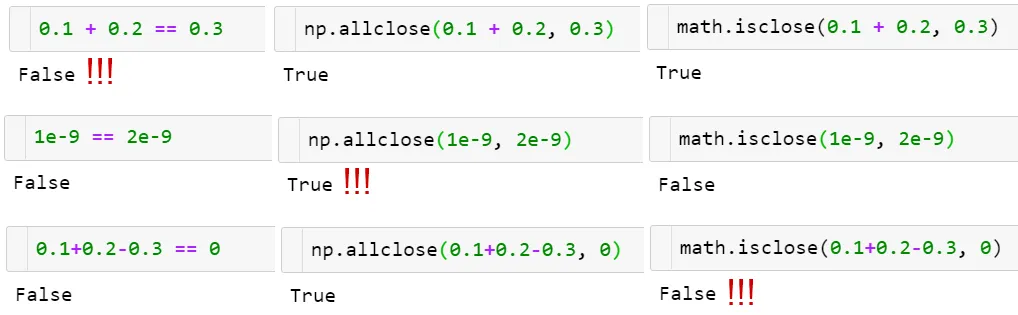

W kontekście pierwszego przykładu możemy zestawić również poniższe porównanie:

In [234]:
a = 0.99999
b = 1.00000
a == b, np.isclose(a, b)

(False, np.True_)

Nieco więcej o tym problemie można znaleźć na stronie [The Floating-Point Guide. Comparison](https://floating-point-gui.de/errors/comparison/).